In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from src.data_loader import load_glass, load_seeds
from src.common import create_base_classifier, get_score
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np
from tqdm import tqdm


seeds_df, seeds_target = load_seeds()

glass_df, glass_target = load_glass()

wine_df, wine_target = load_wine(as_frame=True, return_X_y=True)


In [49]:
nums_of_classifiers = np.arange(1, 100)

results_df = pd.DataFrame(
    columns=[
        "n_estimators",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for num in tqdm(nums_of_classifiers):
    clf = BaggingClassifier(
        estimator=create_base_classifier(),
        n_estimators=num,
        random_state=42,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_df.loc[len(results_df)] = [
        num,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_df.head(10))

max_samples = np.arange(0.1, 1.1, 0.1)

results_samples_df = pd.DataFrame(
    columns=[
        "max_samples",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for samples in tqdm(max_samples):
    clf = BaggingClassifier(
        estimator=create_base_classifier(),
        random_state=42,
        max_samples=samples,
        bootstrap=False,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_samples_df.loc[len(results_samples_df)] = [
        samples,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_samples_df.head(10))

max_features = np.arange(0.1, 1.1, 0.1)

results_features_df = pd.DataFrame(
    columns=[
        "max_features",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for features in tqdm(max_features):
    clf = BaggingClassifier(
        estimator=create_base_classifier(),
        random_state=42,
        max_features=features,
        bootstrap_features=False,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_features_df.loc[len(results_features_df)] = [
        features,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_features_df.head(10))


100%|██████████| 99/99 [00:12<00:00,  8.23it/s]


,n_estimators,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,1.0,0.555556,0.0,0.392960,0.0,0.509476,0.0
1,2.0,0.555556,0.0,0.542022,0.0,0.509476,0.0
2,3.0,0.555556,0.0,0.565341,0.0,0.509476,0.0
3,4.0,0.555556,0.0,0.391473,0.0,0.832681,0.0
4,5.0,0.555556,0.0,0.565891,0.0,0.832681,0.0
5,6.0,0.555556,0.0,0.565891,0.0,0.832681,0.0
6,7.0,0.555556,0.0,0.565891,0.0,0.889495,0.0
7,8.0,0.555556,0.0,0.565891,0.0,0.889495,0.0
8,9.0,0.555556,0.0,0.542755,0.0,0.889495,0.0
9,10.0,0.555556,0.0,0.542755,0.0,0.889495,0.0


100%|██████████| 10/10 [00:00<00:00, 31.26it/s]


,max_samples,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,0.1,0.851409,0.0,0.517970,0.0,0.917443,0.0
1,0.2,0.822565,0.0,0.514408,0.0,0.888889,0.0
2,0.3,0.879570,0.0,0.381515,0.0,0.861317,0.0
3,0.4,0.904274,0.0,0.334000,0.0,0.945336,0.0
4,0.5,0.879570,0.0,0.520230,0.0,0.972263,0.0
5,0.6,0.879570,0.0,0.334000,0.0,0.972047,0.0
6,0.7,0.555556,0.0,0.298104,0.0,0.836441,0.0
7,0.8,0.555556,0.0,0.334000,0.0,0.836441,0.0
8,0.9,0.555556,0.0,0.334000,0.0,0.834000,0.0
9,1.0,0.555556,0.0,0.334000,0.0,0.507349,0.0


100%|██████████| 10/10 [00:00<00:00, 31.85it/s]


,max_features,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,0.1,0.806284,0.0,0.500352,0.0,0.943210,0.0
1,0.2,0.806284,0.0,0.500352,0.0,0.884708,0.0
2,0.3,0.533221,0.0,0.542078,0.0,0.972263,0.0
3,0.4,0.533221,0.0,0.565891,0.0,1.000000,0.0
4,0.5,0.533221,0.0,0.542755,0.0,0.915717,0.0
5,0.6,0.533221,0.0,0.542755,0.0,0.861688,0.0
6,0.7,0.533221,0.0,0.542022,0.0,0.829874,0.0
7,0.8,0.555556,0.0,0.542022,0.0,0.888958,0.0
8,0.9,0.555556,0.0,0.542022,0.0,0.888958,0.0
9,1.0,0.555556,0.0,0.542755,0.0,0.889495,0.0


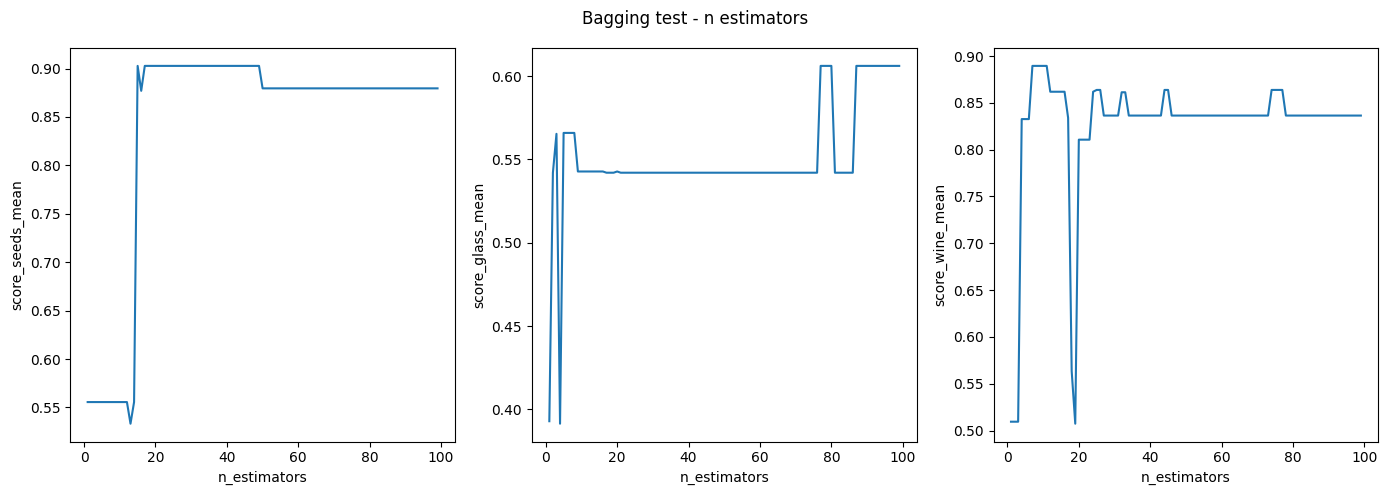

In [50]:
from src.common import plot_results

plot_results(
    results_df,
    "n_estimators",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Bagging test - n estimators",
)


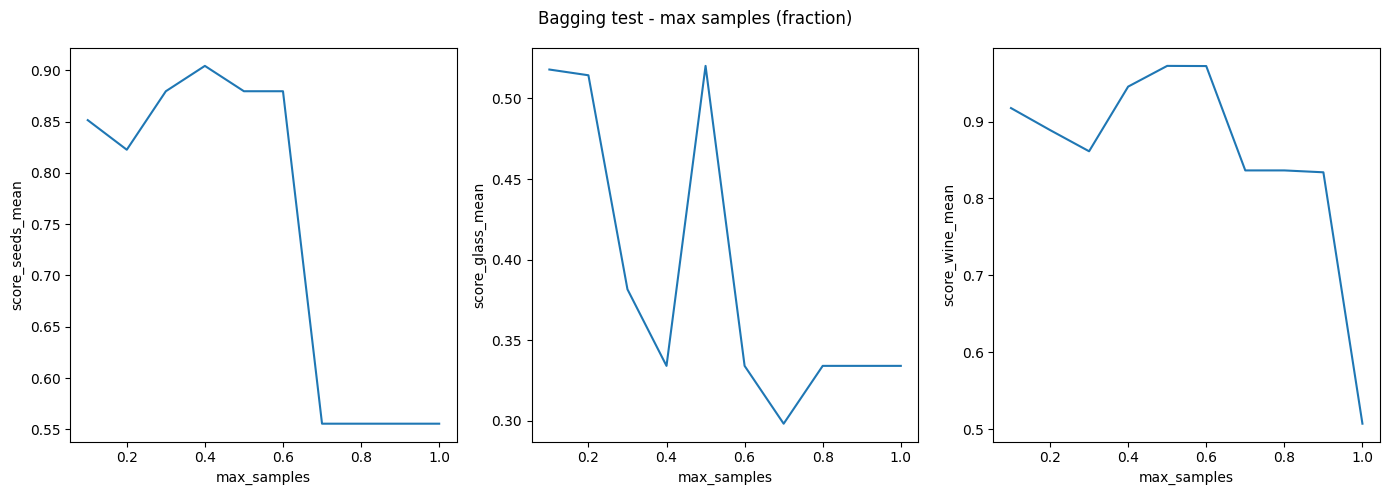

In [51]:
plot_results(
    results_samples_df,
    "max_samples",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Bagging test - max samples (fraction)",
)


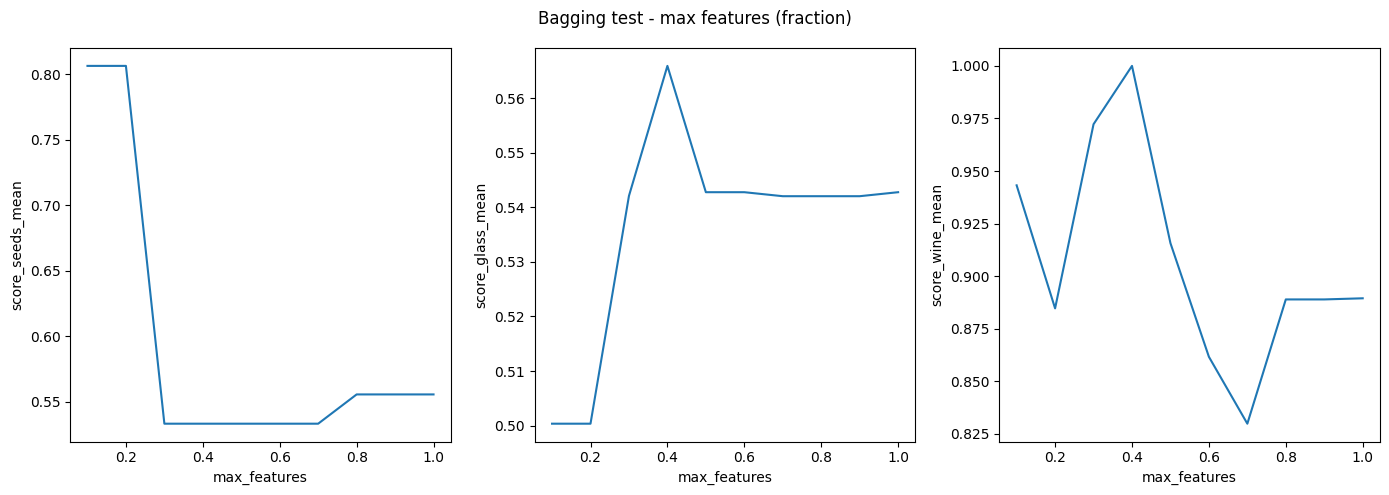

In [52]:
plot_results(
    results_features_df,
    "max_features",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Bagging test - max features (fraction)",
)


In [55]:
clf_seeds = BaggingClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    max_features=0.2,
    bootstrap=False,
    bootstrap_features=False,
    max_samples=0.4,
    n_estimators=40,
)

clf_glass = BaggingClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    max_features=0.4,
    bootstrap=False,
    bootstrap_features=False,
    max_samples=0.5,
    n_estimators=100,
)

clf_wine = BaggingClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    max_features=0.4,
    bootstrap=False,
    bootstrap_features=False,
    max_samples=0.6,
    n_estimators=5,
)


score = get_score(
    seeds_df, seeds_target.to_numpy().ravel(), cross_val=True, clf=clf_seeds
)
print(f"Cross val score on seeds: mean = {score.mean()}, std = {score.std()}")

score = get_score(
    glass_df, glass_target.to_numpy().ravel(), cross_val=True, clf=clf_glass
)
print(f"Cross val score on glass: mean = {score.mean()}, std = {score.std()}")

score = get_score(wine_df, wine_target.to_numpy().ravel(), cross_val=True, clf=clf_wine)
print(f"Cross val score on wine: mean = {score.mean()}, std = {score.std()}")


Cross val score on seeds: mean = 0.8476190476190476, std = 0.05753831415997416
Cross val score on glass: mean = 0.6262458471760797, std = 0.031865990188124374
Cross val score on wine: mean = 0.8822222222222222, std = 0.07022011248588869
